In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize']= (10.0, 10.0)

In [245]:
data_df = pd.read_csv('/content/9.csv')
print(data_df.shape)
data_df.head()

(4572, 5)


,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181


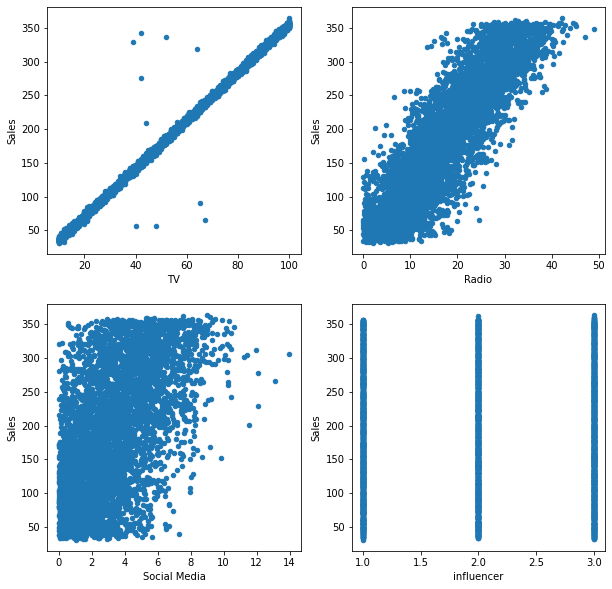

In [249]:
import matplotlib.pyplot as plt

# create scatter plots of TV, Radio, Social Media, and Influencer against Sales
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
data_df.plot(x='TV', y='Sales', kind='scatter', ax=axs[0][0])
data_df.plot(x='Radio', y='Sales', kind='scatter', ax=axs[0][1])
data_df.plot(x='Social Media', y='Sales', kind='scatter', ax=axs[1][0])
data_df.plot(x='influencer', y='Sales', kind='scatter', ax=axs[1][1])

In [248]:
# Create a mapping from the string values to the numeric values
mapping = {"Mega": 3, "Micro": 2, "Nano": 1}

# Use the map method to apply the mapping to the "influencer" column
data_df['influencer'] = data_df['Influencer'].map(mapping)

# Save the DataFrame to a new CSV file
data_df.to_csv("/content/9.csv", index=False)
data_df.head()

,TV,Radio,Social Media,Influencer,Sales,influencer
0,16,6.566231,2.907983,Mega,54.732757,3.0
1,13,9.237765,2.409567,Mega,46.677897,3.0
2,41,15.886446,2.913410,Mega,150.177829,3.0
3,83,30.020028,6.922304,Mega,298.246340,3.0
4,15,8.437408,1.405998,Micro,56.594181,2.0


In [250]:
# Calculate the mean of the "TV" column
tv_mean = data_df["TV"].mean()
print("Mean of TV column:", tv_mean)

# Calculate the mean of the "Radio" column
radio_mean = data_df["Radio"].mean()
print("Mean of Radio column:", radio_mean)

#calculate the mean of the "social media column"
social_media = data_df["Social Media"].mean()
print("Mean of Radio column:",social_media )

# Calculate the mean of the "influencer" column
mean_influencer =data_df['influencer'].mean()
print("Mean of Influencer:", mean_influencer)

# Calculate the mean of the "Sales" column
sales_mean = data_df["Sales"].mean()
print("Mean of Sales column:", sales_mean)

Mean of TV column: 54.0586176727909
Mean of Radio column: 18.160355892662654
Mean of Radio column: 3.323956161385458
Mean of Influencer: 2.0055072463768115
Mean of Sales column: 192.46660210662066


In [251]:
# Replace values in the tv column with the mean of the column
data_df["TV"].fillna(data_df["TV"].mean(), inplace=True)
data_df["Radio"].fillna(data_df["Radio"].mean(), inplace=True)
data_df["Social Media"].fillna(data_df["Social Media"].mean(), inplace=True)
data_df["influencer"].fillna(data_df["influencer"].mean(), inplace=True)
data_df["Sales"].fillna(data_df["Sales"].mean(), inplace=True)

In [252]:
#convert data set into array
tv = data_df['TV'].to_numpy()
radio = data_df['Radio'].to_numpy()
social_media =  data_df['TV'].to_numpy()
influencerr = data_df['influencer'].to_numpy()
sales = data_df['Sales'].to_numpy()
print(tv,radio,social_media,influencerr,sales)


[16 13 41 ... 44 71 42] [ 6.56623079  9.23776457 15.88644602 ... 19.80007236 17.5346403
 15.96668752] [16 13 41 ... 44 71 42] [3.         3.         3.         ... 2.         2.00550725 2.        ] [ 54.73275715  46.67789698 150.1778288  ... 163.6314574  253.6104113
 148.2024141 ]


In [253]:
#sanity check
if tv.shape == radio.shape == social_media.shape == influencerr.shape == sales.shape:
    print("Proceed further")
else:
    print("Array shape mismatch: Try again")

Proceed further


Visualize the data set


/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



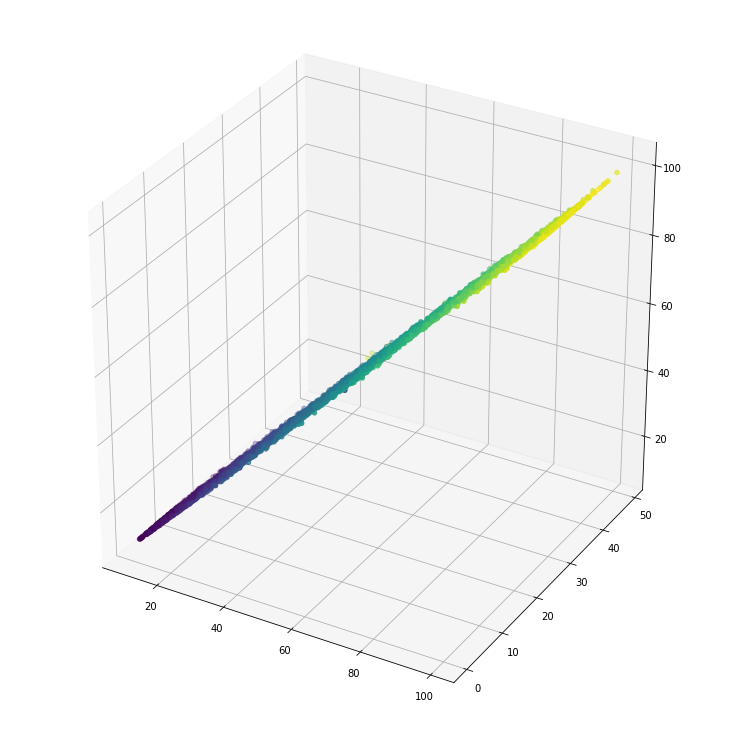

In [254]:
from mpl_toolkits.mplot3d import Axes3D
#plotting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tv, radio, social_media, influencerr, c=sales, cmap='viridis')
plt.show()

In [255]:
# initalizing Matrics which act as an container to hold our datas
#W = np.random.rand(5)
x0 = np.ones(len(tv))
X2 = np.array([x0,tv,radio,social_media,influencerr]).T
W = np.array([0,0,0,0,0])
Y2 = np.array(sales)
Y2_mean = np.mean(Y2[~np.isnan(Y2)])
Y2[np.isnan(Y2)] = Y2_mean

In [256]:
print(np.isnan(X2).any())  # checking id X2 contain nan value or not
print(np.isnan(W).any())
print(np.isnan(Y2).any())

False
False
False


In [257]:
print(np.isnan(tv).sum())     #checking if nan or not
print(np.isnan(radio).sum())
print(np.isnan(social_media).sum())
print(np.isnan(influencerr).sum())
print(np.isnan(sales).sum())

0
0
0
0
0


Implementing cost /error function

In [258]:
#define the cost function 
def cost_function(X,Y,W): # cost_function calculates the cost of the model using mean squared error
  m = len(Y)
  J = np.sum((X.dot(W) - Y) ** 2 )/(2 * m)
  return J


In [259]:
inital_cost = cost_function(X2, Y2, W)
print(inital_cost)


22851.942819630574


Optimization Algorithm

In [260]:
def gradient_descent(X,Y,B,alpha,iterations):
  cost_history = [0] * iterations
  m = len(Y)

  for iteration in range(iterations):
    #hypothesis value
    Y_pred = X.dot(B)
    # difference between hypothesis and actual Y
    loss = Y_pred - Y
    #gradiant calculation
    dw = (X.T.dot(loss))/(m)
    #changing value of B using gradiant 
    W_update = B - alpha *dw
    #New cost Value
    cost = cost_function(X, Y, W_update)
    cost_history[iteration] = cost
    B = W_update

  return B, cost_history 

In [261]:
#100000 iterations
alpha = 0.0001 #rate
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha,100000)

#new values of 
print(new_weights)

#final cost of our iterations.
print(cost_history[-1])

[0.17054119 1.74934281 0.16766738 1.74934281 0.05379659]
33.51713342528227


Model Evaluating - RMSE

In [262]:
# rmse function calculates the root mean squared error between actual target values and predicted target values
# It takes 2 inputs - Y (the actual target values) and Y_pred (the predicted target values)
# The rmse is calculated as the square root of the average of the squared differences between Y and Y_pred
# Finally, the rmse is returned as the output of the function

def rmse(Y, Y_pred):
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse


Model Evlauating R2

In [263]:
# r2 function calculates the coefficient of determination (R^2) between actual target values and predicted target values
def r2(Y, Y_pred):
  mean_y = np.mean(Y)
  ss_tot = sum((Y - mean_y) ** 2)
  ss_res = sum((Y - mean_y) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

model performance


In [264]:

Y_pred = X2.dot(new_weights)

print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

8.187445685350522
0.0


In [268]:
print(np.shape(Y_pred_pca))

(4572, 1)


In [266]:
#compute_rmse function calculates the root mean squared error between actual target values and predicted target values
# It takes 2 inputs - y_true (the actual target values) and y_pred (the predicted target values)
# The number of samples in y_true is first calculated using len(y_true) and stored in the variable 'm'
# The rmse is calculated as the square root of the sum of squared differences between y_true and y_pred, divided by m
# Finally, the rmse is returned as the output of the function
def compute_rmse(y_true, y_pred):
    m = len(y_true)
    return np.sqrt(np.sum((y_pred - y_true) ** 2) / m)

PCA

In [267]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X2)
W_pca = np.zeros(2)
Y2_pca = np.array(Y2)
alpha = 0.001
new_weights_pca, cost_history_pca = gradient_descent(X_pca, Y2_pca, W_pca, alpha, 100000)
new_weights_pca = new_weights_pca.reshape((2,1))
print(new_weights_pca)
Y_pred_pca = X_pca.dot(new_weights_pca)
Y_pred_pca = np.reshape(Y_pred_pca, (-1, 1))
rmse_value = compute_rmse(Y2_pca, Y_pred_pca)
print(rmse_value)
print(r2(Y2_pca, Y_pred_pca))

[[ 2.44777603]
 [-0.39306058]]
15755.87074685154
0.0


**Conclusion**
importing panda and other function. then genrating the data set from csv file, then priting the data.then creating scatter plot of all independt data against the dependent data. influencer was on string format changing it into integer.Then we have blank spaces in some data plots in csv file. so calculating mean of particaular indipendent data and dependent data and replacing those mean at that blank spaces.then changing those data into array type.After filtering, we now plot thpose data into 3d plot.then, initializes several matrices and arrays that will hold data for the model.creating a matrix formed by concatenating x0, tv, radio, social_media, and influencerr matrices.then calculating cost of the model using mean square error.it allows us to quantify the error of the model and determine how well it fits the data. By minimizing the cost function, we can find the  model weights that minimize the error and provide the best fit that dits the data.gradient_descent implements the gradient descent algorithm to train a linear regression model.then we have rmse and r2 




\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
================================
```
=================================
```
/////////////////////////////////


# SECTION **2** 
Logistic Regression

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [270]:
df = pd.read_csv('/content/9 (2).csv')
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5064,Female,13.0,0,0,No,Rural,103.08,18.6,Unknown,0
5065,Female,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0
5066,Female,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0
5067,Male,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0


Checking the null values in whole dataset

In [271]:
df.isnull().sum(axis=0) 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Calculating the unique values in columns

In [272]:
print("Total unique values in Residence_type column are: ",df['Residence_type'].nunique())
print("Unique values are: ",df['Residence_type'].unique())
#how many unique value are there in residence _type data

Total unique values in Residence_type column are:  2
Unique values are:  ['Urban' 'Rural']


In [273]:
print("Total unique values in ever_married column are: ",df['ever_married'].nunique())
print("Unique values are: ",df['ever_married'].unique())

Total unique values in ever_married column are:  2
Unique values are:  ['Yes' 'No']


In [274]:
print("Total unique values in smoking_status column are: ",df['smoking_status'].nunique())
print("Unique values are: ",df['smoking_status'].unique())

Total unique values in smoking_status column are:  4
Unique values are:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Calculating the total values of each category in above columns

In [275]:
x = df['Residence_type'].value_counts()
x = x.reset_index()
x
#how many unique bvalue are there from above volumn

,index,Residence_type
0,Urban,2571
1,Rural,2498


Checking the smoking status of the people¶


In [276]:
interim_data = df['smoking_status'].value_counts().rename_axis('Smoking-Status').reset_index(name='Counts in each category of smoking status')
interim_data

,Smoking-Status,Counts in each category of smoking status
0,never smoked,1885
1,Unknown,1530
2,formerly smoked,872
3,smokes,782


In [277]:
import plotly.express as px
fig = px.bar(interim_data,x='Smoking-Status',y='Counts in each category of smoking status',title='Category of people in smoking',hover_data=['Smoking-Status', 'Counts in each category of smoking status'], color='Smoking-Status',width=900,height=700)
fig.update_xaxes(type='category')
fig.show()
#using plotly funtion to show the graph of the smoking statues from the data set




Calculating the percentage average level of glucose in male and female

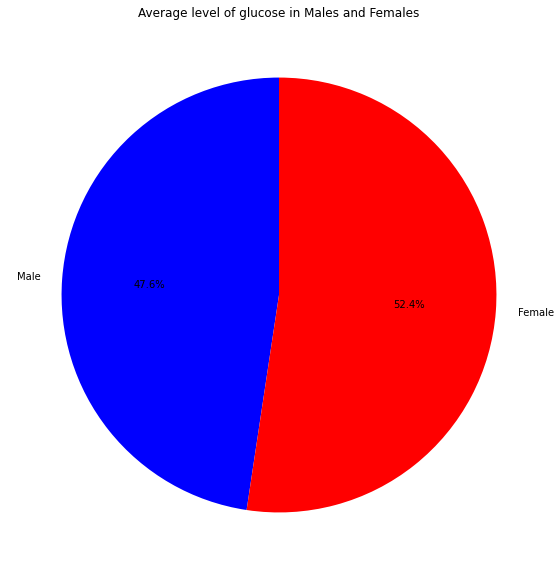

In [278]:
import matplotlib.pyplot as plt

# Data
df = {'gender': ['Male', 'Female'],
      'avg_glucose_level': [100, 110]}

# Create pie chart
plt.pie(df['avg_glucose_level'], labels=df['gender'], colors=['blue', 'red'], startangle=90, autopct='%1.1f%%')

# Add title
plt.title('Average level of glucose in Males and Females')

# Show plot
plt.show()

Calculating the percentage average level of glucose according to residence type

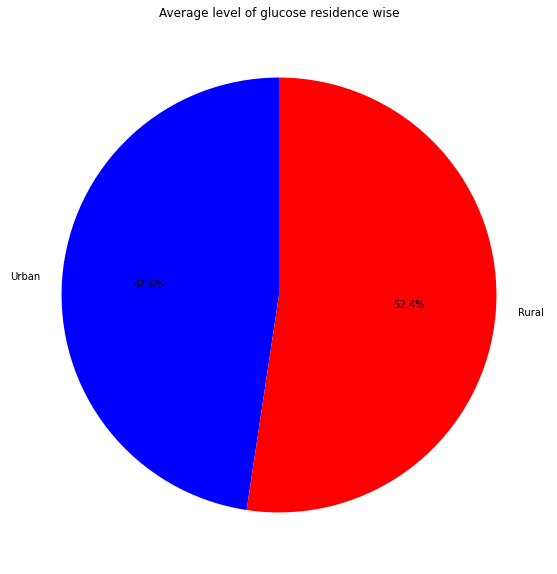

In [279]:
# Data
df = {'Residence_type': ['Urban', 'Rural'],
      'avg_glucose_level': [100, 110]}

# Create pie chart
plt.pie(df['avg_glucose_level'], labels=df['Residence_type'], colors=['blue', 'red'], startangle=90, autopct='%1.1f%%')

# Add title
plt.title('Average level of glucose residence wise')

# Show plot
plt.show()

Plotting the figure to find which gender is suffering more from hypertension and heart disease

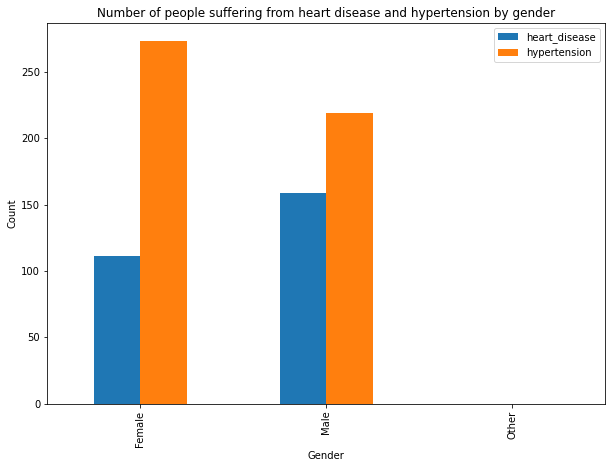

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the csv file
df = pd.read_csv("/content/9 (2).csv")

# Create a new dataframe with only the columns we want to use
interim_df = df[['gender', 'heart_disease', 'hypertension']]

# Group the data by gender and count the number of occurrences of each disease for each gender
grouped_df = interim_df.groupby('gender').sum()

# Plot the data
grouped_df.plot(kind='bar', figsize=(10, 7))
plt.title("Number of people suffering from heart disease and hypertension by gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Checking how many people are married or not




In [281]:
interim_data = df['ever_married'].value_counts().reset_index()
interim_data.rename(columns={'index':'Status whether people are married or not'},inplace=True)
fig = px.pie(interim_data,values='ever_married', names='Status whether people are married or not', title='Percentage of people married or not',width=800)
fig.show()
#from the data set ploting in pie chart percentage of people who are marridge and not

Printing the original dataframe

In [282]:
df


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5064,Female,13.0,0,0,No,Rural,103.08,18.6,Unknown,0
5065,Female,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0
5066,Female,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0
5067,Male,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0


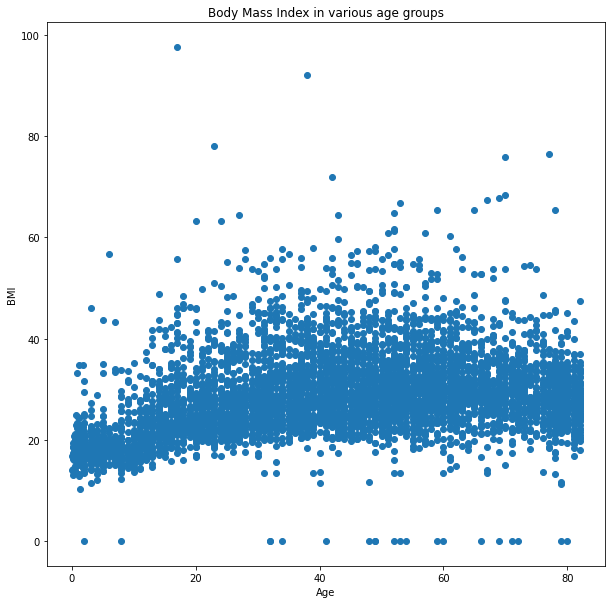

In [283]:

ages = df['age'].tolist()
bmis = df['bmi'].tolist()

plt.scatter(ages, bmis)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Body Mass Index in various age groups')
plt.show()
#plotting the data set of the age group and their BM index

Feature Selection Process

In [284]:
#chi_square_test calculates the chi-square statistic for the contingency table and performs a hypothesis test to determine if there is a significant association between the two variables represented in the contingency table. The hypothesis being tested is the null hypothesis (H0) that the two variables are independent.
def create_contingency_table(dataframe):
    table=[]
    for i in range(len(dataframe)):
        col = []
        for j in range(len(dataframe.columns)):
            col.append(dataframe[dataframe.columns[j]][i])
        table.append(col)
    return table


def chi_square_test(table):
    r, c = len(table), len(table[0])
    observed = np.array(table)
    total = observed.sum()
    expected = np.zeros_like(observed)
    for i in range(r):
        for j in range(c):
            expected[i, j] = (observed[i].sum() * observed[:, j].sum()) / total
    chi_square = np.sum((observed - expected)**2 / expected)
    return chi_square
    
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Critical value=%.3f, Stat=%.3f' % (critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [285]:
def create_contingency_table(data_gender_married):
    data_gender_married = data_gender_married + 0.5
    return data_gender_married.values.tolist()
    

In [286]:
print(data_gender_married)
#From the above output we came to know that gender and ever_married columns are dependent on each other, therefore we can discard the ever_married columns as a part of feature selection process.

ever_married   No   Yes
gender                 
Female        989  1985
Male          759  1335
Other           1     0


In [287]:
dummies_gender = pd.get_dummies(df['gender'])
dummies_residence_type = pd.get_dummies(df['Residence_type'])
dummies_smoking_status = pd.get_dummies(df['smoking_status'])

In [288]:
final_df = pd.concat([df,dummies_gender,dummies_residence_type,dummies_smoking_status],axis='columns')
final_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,1,0,0
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1,0,1,0,1,0,0,0,1,0
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1,1,0,0,0,1,0,0,0,1
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1,1,0,0,1,0,0,0,1,0
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,Female,13.0,0,0,No,Rural,103.08,18.6,Unknown,0,1,0,0,1,0,1,0,0,0
5065,Female,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0,1,0,0,0,1,0,0,1,0
5066,Female,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0,1,0,0,1,0,0,0,1,0
5067,Male,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0,0,1,0,1,0,0,1,0,0


Now from the above dataframe we can now drop the old categorical values as they are being converted to numeric data through one hot encoding.

In [289]:
final_df.drop(columns=['gender','ever_married','Residence_type','smoking_status'],inplace=True)
final_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,13.0,0,0,103.08,18.6,0,1,0,0,1,0,1,0,0,0
5065,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,1,0
5066,35.0,0,0,82.99,30.6,0,1,0,0,1,0,0,0,1,0
5067,51.0,0,0,166.29,25.6,0,0,1,0,1,0,0,1,0,0


In [290]:
final_df['stroke'].value_counts()

0    4852
1     217
Name: stroke, dtype: int64

Splitting the data set into training and testing.¶


In [291]:
y = final_df['stroke']
X = final_df.drop(columns=['stroke'])


In [292]:
y = final_df['stroke'].values.ravel() #is used to convert y into a one-dimensional numpy array by using the ravel method. 

In [293]:
majority_class_indices = np.where(y == 0)[0] #separates the majority class  from the minority class


In [294]:
minority_class_indices = np.where(y == 1)[0] # to find the indices where y equals 0 or 1. these indices are store in minority_classes


In [295]:
num_samples = int(len(minority_class_indices) * 0.6) # calculates the number of samples to be taken from the majority class. This is done by multiplying the length of the minority class indices by 0.6 and converting the result to an integer using the int function. This number of samples is stored in the num_samples variable.


In [296]:
random_indices = np.random.choice(majority_class_indices, num_samples, replace=False) #selects num_samples random indices from the majority class indices using np.random.choice, and stores the result in the random_indices variable.


In [297]:
combined_indices = np.concatenate([random_indices, minority_class_indices]) #concatenates the random_indices and minority_class_indices arrays into a single array,


In [298]:
X_sampled = X.iloc[combined_indices] #iloc method to extract the rows at the combined_indices from the original data X and store the result in X_sampled. 
y_sampled = y.take(combined_indices) # use the take method to extract the target values at the combined_indices from the original target values y and store the result in y_sampled.

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.4, random_state=42) # split X_sampled and y_sampled into training and testing sets, with the testing set being 40% of the total data. The random_state parameter is set to 42 to ensure reproducibility.


In [300]:
print('Length of training and testing data is: ')
print('X_train=%.3f, X_test=%.3f, y_train=%3f, y_test=%.3f' % (len(X_train), len(X_test), len(y_train), len(y_test)))


Length of training and testing data is: 
X_train=208.000, X_test=139.000, y_train=208.000000, y_test=139.000


In [301]:
X_train = X_train.T # reshaping the training data into a transpose matrix by using the .T
y_train = y_train.reshape(1, y_train.shape[0])  #reshaping the target training data y_train into a 2D numpy array with one row and multiple columns.

X_test = X_test.T #
y_test = y_test.reshape(1, y_test.shape[0])

In [302]:
print("shape of x train",X_train.shape)
print("shape of y train",y_train.shape)
print("shape of x test",X_test.shape)
print("shape of y test",y_test.shape)


shape of x train (14, 208)
shape of y train (1, 208)
shape of x test (14, 139)
shape of y test (1, 139)


implementing a Logistic Regression model with a sigmoid activation function. 

In [303]:
def sigmoid(x): #calculates the sigmoid activation for a given input x. 
  return 1/(1 + np.exp(-x))

In [304]:
def model(X, y,learning_rate, iterations): #The function model(X, y, learning_rate, iterations) trains the logistic regression model.
  #The training data matrix with m examples and n features.
  #The target vector with m binary labels, where y[i]=1 indicates that the i-th example belongs to the positive class and y[i]=0 indicates the i-th example belongs to the negative class.
  
  m = X_train.shape[1]
  n = X_train.shape[0]

#
  W = np.zeros((n,1))
  B = 0 

  cost_list = []

  for i in range(iterations): #The number of iterations to perform during Gradient Descent optimization.

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    cost = -(1/m) * np.sum(y * np.log(A) + (1-y) * np.log(1-A))

 

    dw = (1/m)*np.dot(A-y, X.T)
    dB = (1/m)*np.sum(A -y)

 #The learning rate used in Gradient Descent optimization.
    W = W - learning_rate*dw.T
    B = B - learning_rate*dB

    cost_list.append(cost)
##The function returns the learned parameters W and B and a list of costs after each iteration, which is stored in cost_list.

    if(i%(iterations/10) == 0 ):
        print("cost after", i, "iteration is :", cost)
  return W ,B, cost_list  


In [305]:
iterations = 10000
learning_rate = 0.0005
W, B, cost_list = model(X_train, y_train, learning_rate=learning_rate, iterations=iterations)

#iterations is printed to track the progress of the optimization.


cost after 0 iteration is : 0.6931471805599453
cost after 1000 iteration is : 0.49228147120190213
cost after 2000 iteration is : 0.48905346488370355
cost after 3000 iteration is : 0.48595360322715986
cost after 4000 iteration is : 0.48297545899315664
cost after 5000 iteration is : 0.48011323388064714
cost after 6000 iteration is : 0.4773614167465763
cost after 7000 iteration is : 0.4747147721067874
cost after 8000 iteration is : 0.4721683285155761
cost after 9000 iteration is : 0.46971736694822525


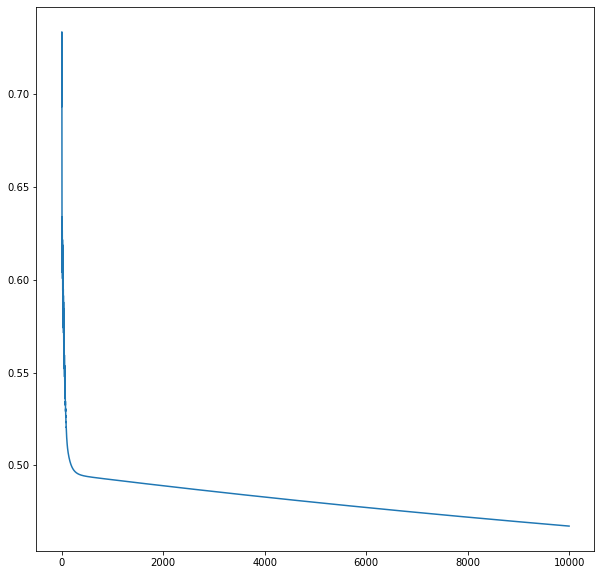

In [306]:
plt.plot(np.arange(iterations), cost_list)

check accuracy


In [307]:
#accuracy function takes in the X_test and y_test as inputs and computes the accuracy of the model by comparing the predicted outputs with the actual outputs
def accuracy (X ,y,W,B):
  Z = np.dot(W.T, X) + B
  A = sigmoid(Z)

  A = A > 0.5 # a will be on booliean
   
  A = np.array(A, dtype = 'int64') # into integer
  acc = (1 - np.sum(np.absolute(A-y))/y.shape[1])*100

  print("accuracy of the model is :", acc , "%")


In [308]:
accuracy(X_test, y_test,W,B) # The accuracy is computed as the percentage of correct predictions.

accuracy of the model is : 74.82014388489209 %


In [309]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train.T)
X_test_pca = pca.transform(X_test.T)

Conclusion : Import all necessary library then generate data from the CSV file. create scatter plots of TV, Radio, Social Media, and Influencer against Sales
then , check #how many unique bvalue are there from above volumn for all datapresent use plotly funtion to show the graph of the smoking statues from the data set,Group the data by gender and count the number of occurrences of each disease for each gender then show it. then again Checking how many people are married or not and show it on pie chart.plot the data set of bmi of bwtween many age groups.chi_square_test calculates the chi-square statistic for the contingency table and performs a hypothesis test to determine if there is a significant association between the two variables represented in the contingency table. The hypothesis being tested is the null hypothesis (H0) that the two variables are independent.generate dummy data in the table.then test and train the data set, then we will have 1D test and train.then we will change that 1d test train data set into 2d for ytest and ytrain sets.we then implementing a Logistic Regression model with a sigmoid activation function. then we get accuracy model then we perform pca

